In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [4]:
df = pd.read_csv(r'C:\Users\alvarocairo\Insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [5]:
# Count the occurrences of 'male' and 'female' in the 'sex' column
sex_counts = df['sex'].value_counts()

# Display the counts
print(sex_counts)

sex
male      676
female    662
Name: count, dtype: int64


In [7]:
# Group the data by 'sex' and calculate the mean 'expenses' for each group
grouped = df.groupby('sex')['expenses'].mean()

# Calculate the mean difference
mean_difference = grouped['male'] - grouped['female']

# Print the results
print("Mean expenses for males:", grouped['male'])
print("Mean expenses for females:", grouped['female'])
print("Mean difference between males and females:", mean_difference)

Mean expenses for males: 13956.751420118344
Mean expenses for females: 12569.578897280968
Mean difference between males and females: 1387.1725228373762


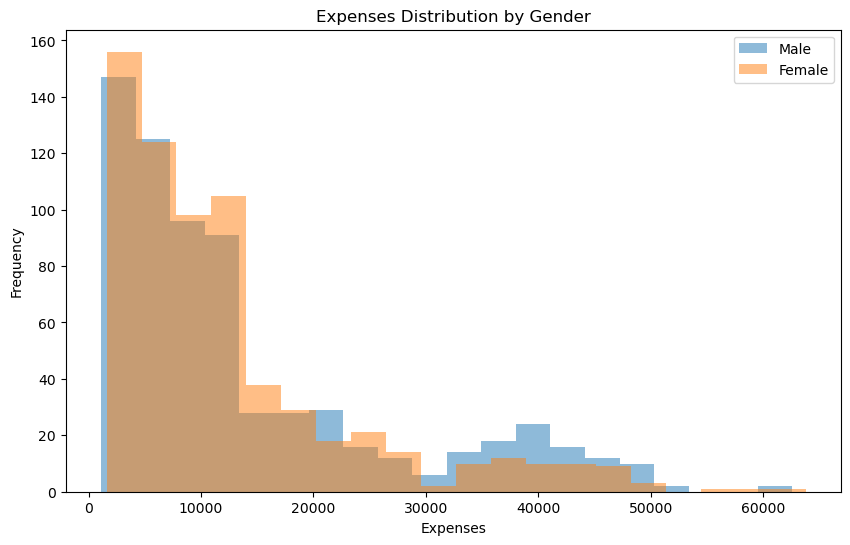

In [8]:
# Group the data by 'sex' and get the 'expenses' column
male_expenses = df[df['sex'] == 'male']['expenses']
female_expenses = df[df['sex'] == 'female']['expenses']

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(male_expenses, bins=20, alpha=0.5, label='Male')
plt.hist(female_expenses, bins=20, alpha=0.5, label='Female')
plt.xlabel('Expenses')
plt.ylabel('Frequency')
plt.title('Expenses Distribution by Gender')
plt.legend(loc='upper right')
plt.show()

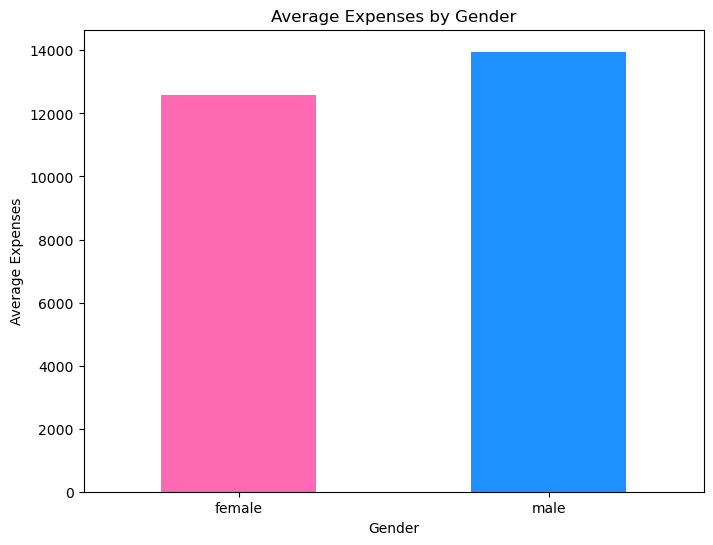

In [15]:
# Group the data by 'sex' and calculate the mean 'expenses' for each group
grouped = df.groupby('sex')['expenses'].mean()

# Define colors for 'male' and 'female' bars
colors = ['hotpink', 'dodgerblue']

# Create a bar chart to display the mean expenses
grouped.plot(kind='bar', figsize=(8, 6), color=colors)
plt.xlabel('Gender')
plt.Color = ['blue', 'pink']
plt.ylabel('Average Expenses')
plt.title('Average Expenses by Gender')
plt.xticks(rotation=0)
plt.show()

In [16]:
# Separate the data into 'male' and 'female' groups
male_data = df[df['sex'] == 'male']['expenses']
female_data = df[df['sex'] == 'female']['expenses']

In [17]:
# Perform the Independent Samples t-test
t_stat, p_value = stats.ttest_ind(male_data, female_data)

# Output the results
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

T-Statistic: 2.0975468761820912
P-Value: 0.03613269566075222


In [18]:
# Determine whether the difference is statistically significant
alpha = 0.05  # Set your significance level
if p_value < alpha:
    print("The difference between 'male' and 'female' groups is statistically significant.")
else:
    print("There is no statistically significant difference between 'male' and 'female' groups.")

The difference between 'male' and 'female' groups is statistically significant.
